лаборатория 2: Medium - Finding the Optimal 'k'
วัตถุประสงค์: ทำความเข้าใจผลกระทบของ Hyperparameter 'k' ในโมเดล k-NN และฝึกฝนกระบวนการหาค่าที่เหมาะสมที่สุด (Hyperparameter Tuning)

สิ่งที่ต้องทำ (Tasks):

ใช้ข้อมูลที่เตรียมไว้แล้วจาก Lab 1

เขียน for loop เพื่อเทรนและประเมินผล KNeighborsClassifier สำหรับค่า k ที่แตกต่างกันไป (เช่น วนตั้งแต่ k=1 ถึง k=30)

เก็บค่า Accuracy ของแต่ละ k ไว้ใน List

ใช้ Matplotlib พล็อตกราฟระหว่างค่า k (แกน X) กับ Accuracy (แกน Y)

จากกราฟ ให้ระบุว่าค่า k ใดให้ Accuracy สูงที่สุด และอภิปรายสั้นๆ ว่าเกิดอะไรขึ้นกับกราฟเมื่อ k มีค่าน้อยมากๆ (อาจเกิด Overfitting) และมากเกินไป (อาจเกิด Underfitting)

เกณฑ์การประเมินผล: สร้างกราฟเปรียบเทียบประสิทธิภาพได้ถูกต้อง สามารถระบุค่า k ที่ดีที่สุด และอธิบายปรากฏการณ์ที่สังเกตเห็นจากกราฟได้ โดยเชื่อมโยงกับทฤษฎี Overfitting/Underfitting

лаборатория 3: Hard - Logistic Regression from Scratch
วัตถุประสงค์: สร้างโมเดล Logistic Regression ด้วย NumPy ตั้งแต่เริ่มต้น เพื่อให้เข้าใจกลไกทางคณิตศาสตร์เบื้องหลัง (Sigmoid, Cost Function, Gradient Descent) อย่างแท้จริง

สิ่งที่ต้องทำ (Tasks):

ใช้ข้อมูลที่เตรียมไว้แล้วจาก Lab 1

เขียนฟังก์ชัน sigmoid(z)

เขียนฟังก์ชัน cost_function(y_true, y_pred) เพื่อคำนวณ Binary Cross-Entropy (BCE) Loss

เขียนฟังก์ชัน fit(X, y, learning_rate, iterations) ซึ่งภายในจะประกอบด้วย:

การเริ่มต้นค่า weights และ bias ด้วยศูนย์

Training loop ที่จะทำการคำนวณ Gradient (dw, db) และอัปเดตค่า weights และ bias ในทุกๆรอบ (Gradient Descent)

เขียนฟังก์ชัน predict(X) ที่รับข้อมูลเข้ามา, คำนวณความน่าจะเป็น, และ return คลาส (0 หรือ 1) โดยใช้ threshold 0.5

นำฟังก์ชันทั้งหมดมาประกอบกันเพื่อเทรนโมเดลบน Training set และวัดค่า Accuracy บน Test set เพื่อเปรียบเทียบกับเวอร์ชันของ scikit-learn

เกณฑ์การประเมินผล: สามารถเขียนทุกฟังก์ชันได้ถูกต้องตามหลักคณิตศาสตร์ โมเดลสามารถเรียนรู้และให้ค่า Accuracy บน Test set ได้ใกล้เคียงกับ scikit-learn ซึ่งแสดงถึงความเข้าใจในอัลกอริทึมอย่างลึกซึ้ง

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

In [3]:
import pandas as pd

cancer_data = load_breast_cancer()
df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)
df['target'] = cancer_data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

y_pred = logistic_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score is : {accuracy}')
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))


Accuracy score is : 0.9736842105263158
              precision    recall  f1-score   support

     Class 0       0.98      0.95      0.96        43
     Class 1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [7]:
k_nearest = KNeighborsClassifier(n_neighbors=5)

k_nearest.fit(X_train,y_train)
y_pred = k_nearest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score is : {accuracy}')
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

Accuracy score is : 0.956140350877193
              precision    recall  f1-score   support

     Class 0       1.00      0.88      0.94        43
     Class 1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [8]:
k_nearest = KNeighborsClassifier(n_neighbors=5)

k_nearest.fit(X_train_scaled,y_train)
y_pred = k_nearest.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score is : {accuracy}')
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

Accuracy score is : 0.9473684210526315
              precision    recall  f1-score   support

     Class 0       0.93      0.93      0.93        43
     Class 1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



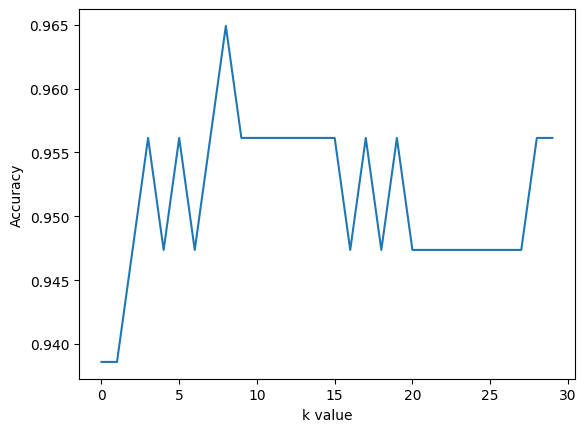

In [9]:
import matplotlib.pyplot as plt

neighbor = 30
accuracy_list = []
for i in range(neighbor):
    k_nearest = KNeighborsClassifier(n_neighbors=i+1)
    k_nearest.fit(X_train_scaled,y_train)
    y_pred = k_nearest.predict(X_test_scaled)
    accuracy = accuracy_score(y_test,y_pred)
    accuracy_list.append(accuracy)


plt.plot(list(range(len(accuracy_list))), accuracy_list)
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.show()

In [10]:
max_k = 0
temp = 0
for i in range(len(accuracy_list)):
    if accuracy_list[i] > temp:
        temp = accuracy_list[i]
        max_k = i + 1
print(max_k)

9


Logistic Regression from Scratch


In [ ]:
import numpy as np

class LogisticRegressionFromScratch:
    def __init__(self, lr = 0.01, iteration = 1000):
        self.lr = lr
        self.iteration = iteration
        self.weight = None
        self.bias = None
        self.cost_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def cost(self, p, y):
        m_samples = len(y)
        return -(1/m_samples) * np.sum(y*(np.log(p)) + (1-y)*(np.log(1-p)))
    
    def fit(self, X, y):
        y = np.array(y)
        m_samples, n_features = X.shape
        self.weight = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.iteration):
            z = np.dot(X,self.weight) + self.bias
            p = self.sigmoid(z)
            loss = self.cost(p,y)
            self.cost_history.append(loss)
            print(f'Loss is : {loss}')
            dw = (1/m_samples) * np.dot(X.T, (p-y))
            db = (1/m_samples) * np.sum((p-y))
            self.weight = self.weight - (self.lr * dw)
            self.bias = self.bias - (self.lr * db)

    def predict(self,X):
        return (self.sigmoid(np.dot(X,self.weight) + self.bias) >= 0.5).astype(int)
    
if __name__ == '__main__':
    logistic_model_scratch = LogisticRegressionFromScratch()
    logistic_model_scratch.fit(X_train_scaled,y_train)
    y_pred = logistic_model_scratch.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)

Loss : 0.6931471805599453
Loss : 0.6739353141133738
Loss : 0.6559064972215113
Loss : 0.6389797634212732
Loss : 0.623076253001436
Loss : 0.6081203882106933
Loss : 0.5940406887627786
Loss : 0.5807702594879951
Loss : 0.5682470068174842
Loss : 0.5564136485513381
Loss : 0.5452175776527391
Loss : 0.5346106312203113
Loss : 0.5245488044352469
Loss : 0.5149919385754075
Loss : 0.5059034032266078
Loss : 0.4972497858633656
Loss : 0.4890005968533988
Loss : 0.48112799433302744
Loss : 0.47360653095283395
Loss : 0.4664129228944205
Loss : 0.4595258405616846
Loss : 0.45292571976615165
Loss : 0.4465945919192689
Loss : 0.440515931618833
Loss : 0.4346745200052926
Loss : 0.42905632232132845
Loss : 0.42364837820475126
Loss : 0.4184387033606709
Loss : 0.41341620138152296
Loss : 0.4085705846051269
Loss : 0.4038923030169125
Loss : 0.39937248031033273
Loss : 0.39500285631813753
Loss : 0.39077573511634334
Loss : 0.3866839381826414
Loss : 0.3827207620621547
Loss : 0.3788799400565725
Loss : 0.37515560750850196
Loss